In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv("../../urine_test_data.csv")
df

,Sample_ID,Organism_1,Organism_2,Organism_3,Organism_4,Organism_5,Organism_6,Organism_7,Organism_8,Organism_9,...,Antibiotic_13,Antibiotic_14,Antibiotic_15,Antibiotic_16,Antibiotic_17,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5
0,Sample_0001,675,291,0,204,666,0,0,0,799,...,S,S,R,S,S,0,0,0,0,0
1,Sample_0002,692,377,0,0,0,971,0,0,0,...,R,R,S,S,S,0,1,0,0,0
2,Sample_0003,0,173,0,0,0,25,0,0,0,...,S,R,S,S,S,0,0,0,0,0
3,Sample_0004,811,0,710,0,0,0,0,485,0,...,S,S,R,S,R,0,0,0,0,0
4,Sample_0005,708,553,0,0,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sample_0996,57,0,0,670,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
996,Sample_0997,221,0,207,0,0,0,506,0,0,...,S,S,R,S,S,0,0,0,0,0
997,Sample_0998,0,0,0,0,0,0,0,0,0,...,S,S,R,R,S,0,0,0,0,0
998,Sample_0999,0,574,0,0,0,0,0,817,0,...,R,S,R,S,S,0,1,0,0,0


In [16]:
organism_columns = ['Organism_'+str(i) for i in range(1,11)]

# standardize data
scaler = StandardScaler()
df_processed = scaler.fit_transform(df[organism_columns])

# initiate a PCA model object
pca = PCA()
# fit the standardized data 
pca.fit(df_processed)
# project the data onto the new principal axes
df_pca = pca.transform(df_processed)

df_pca

array([[ 0.75610415,  1.20298459, -1.46410299, ...,  2.99841916,
        -0.85587331,  0.03566358],
       [ 3.55144164, -1.31374815,  0.98097884, ...,  0.87025661,
        -1.14113733,  2.17261103],
       [-0.09581092,  0.26608044, -0.57780053, ..., -0.25105545,
        -0.12521162, -0.32730984],
       ...,
       [-0.30637308,  0.01448251, -0.55691747, ..., -0.13718248,
         0.05330364, -0.5562209 ],
       [-0.90783768,  0.81930327,  1.50819072, ..., -0.22545868,
         0.79047104, -0.37994783],
       [-0.4191632 ,  0.61801679, -0.05817138, ..., -1.8108201 ,
        -0.16036978,  0.85215816]])

Mathematically, PCA mean-centers data, then projects the data onto the principal axes.<br>
pca.mean_ stores the mean of the data<br>
pca.components_ stores the principal axes in the original feature space<br>
The following translates the process described above to code and confirms with the result that directly calls pca.transform().

In [17]:
df_pca_2 = (df_processed-pca.mean_)@pca.components_.T
np.allclose(df_pca_2,df_pca)

True

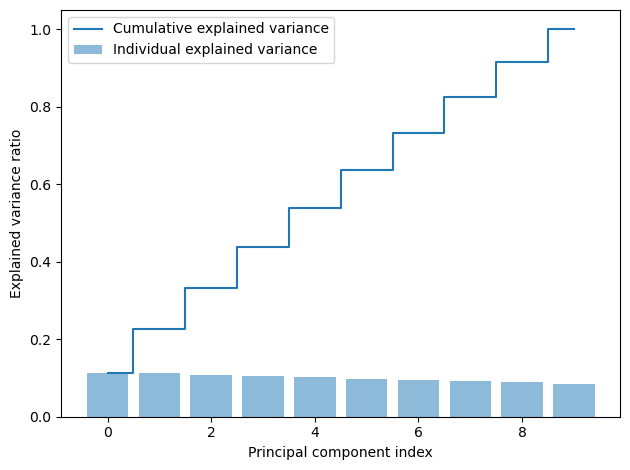

In [18]:
# plot individual and cumulative explained variance
cum_variance = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(pca.n_components_), cum_variance, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Now df_pca stores the transformed data in the new principal component feature space.<br>
We can reduce the dimensionality by taking only the first few (e.g., 2) principal components.<br>
However, **in this case**, the first two components only explains less than 40% of the variance.<br>
Therefore, patterns in the following plot might be misleading. **I would not read too much into this plot**.

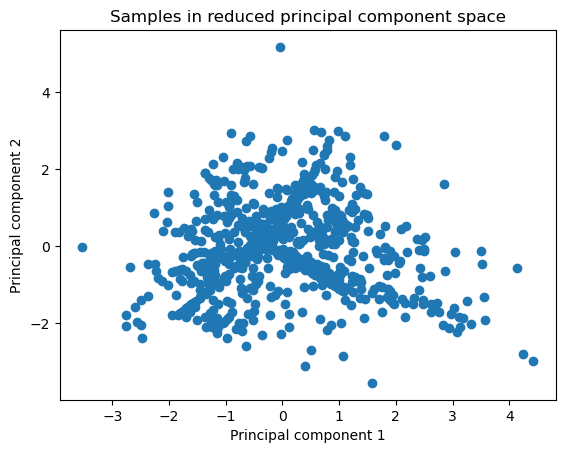

In [19]:
plt.scatter(df_pca[:,0],df_pca[:,1])
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Samples in reduced principal component space")
plt.show()